In [2]:
%matplotlib inline
from matplotlib import pyplot as plt 
import numpy as np 
import pandas as pd
import os
import skimage
from skimage.util import montage
import nibabel

patients = ['sub-AD4009', 'sub-AD4215', 'sub-AD4500', 'sub-AD4892','sub-AD6264']

raw_data_reverted = {}
for patient in patients:
    raw_data_reverted[patient] = pd.read_csv('output/' + patient + '/connect_matrix_reverted.csv')
raw_data_rough = {}
for patient in patients:
    raw_data_rough[patient] = pd.read_csv('output/sub-AD4009/connect_matrix_rough.csv')

In [3]:
data_reverted = {}
data_rough = {}
for patient in patients: 
    data_reverted[patient] = np.array(raw_data_reverted[patient])
    data_rough[patient] = np.array(raw_data_rough[patient])
    #print(patient,  'reverted')
    #plt.imshow(data_reverted[patient])
    #plt.show()
    #print(patient, 'rough')
    #plt.imshow(data_rough[patient])
    #plt.show()

(181, 217, 181)


C:\Users\anith\AppData\Local\Temp/ipykernel_12188/412200546.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  test_image = nibabel.load('aal.nii.gz').get_data()


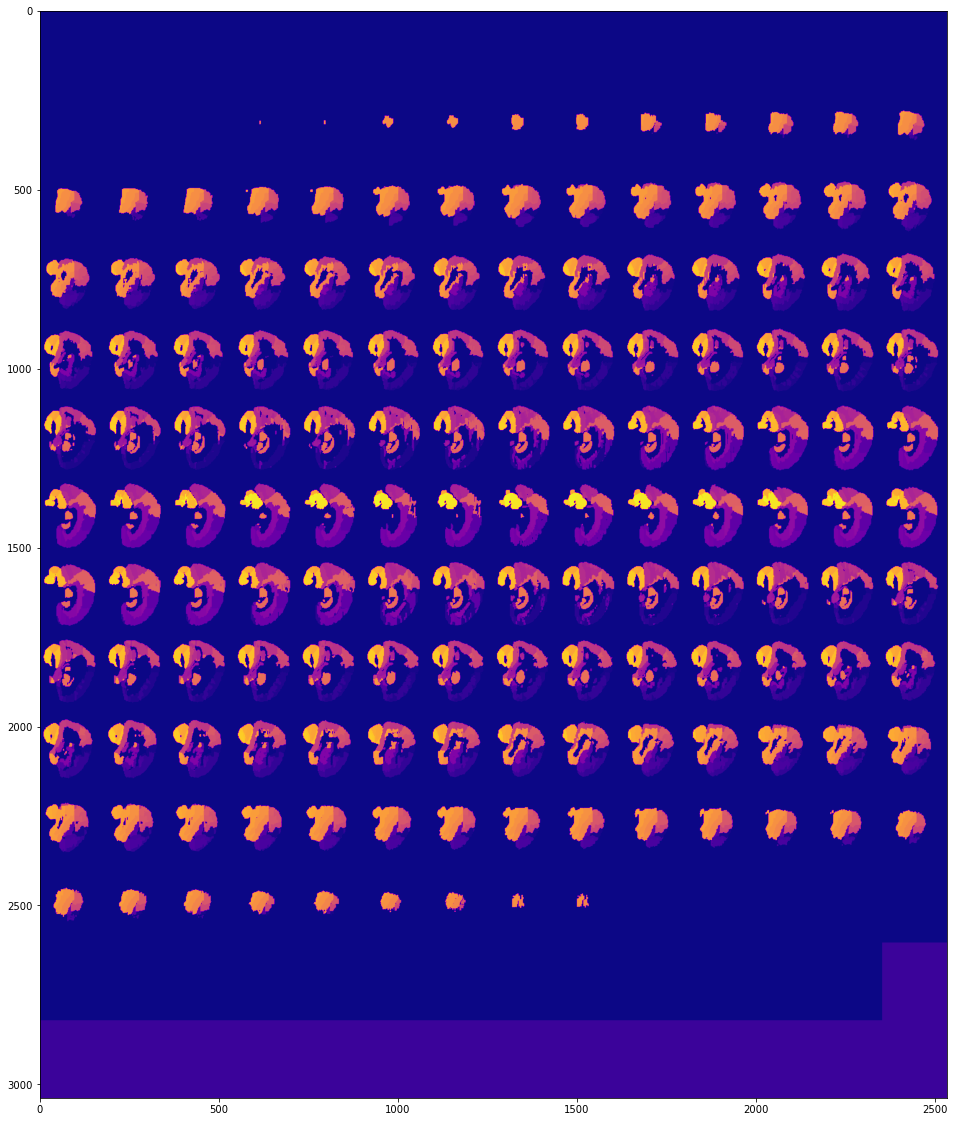

In [10]:
#test image for nii.gz filetype 
fig, ax1 = plt.subplots(1,1,figsize=(20,20))
test_image = nibabel.load('aal.nii.gz').get_data()
#ax1.imshow(test_image[test_image.shape[0]//2])
print(np.array(test_image).shape)
ax1.imshow(montage(test_image), cmap ='plasma')

C:\Users\anith\AppData\Local\Temp/ipykernel_12188/1973422070.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  test_image = nibabel.load("PET_data\sub-AD4009\ses-1\pet-abeta-av45\sub-AD4009_ses-1_acq-AP_pet-abeta-av45[2011-07-07]_opt.nii.gz").get_data()


(181, 217, 181, 4)


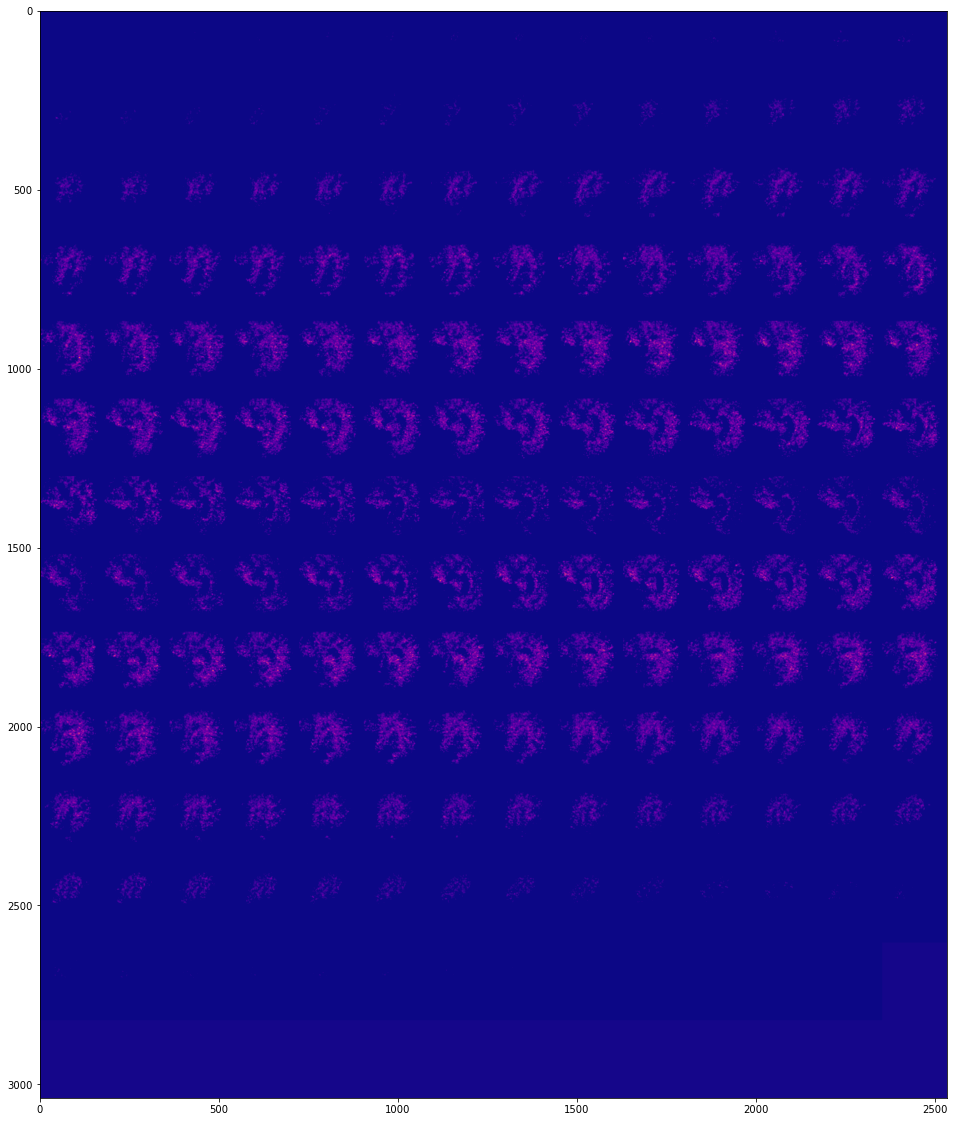

In [21]:
fig, ax1 = plt.subplots(1,1,figsize=(20,20))
test_image = nibabel.load("PET_data\sub-AD4009\ses-1\pet-abeta-av45\sub-AD4009_ses-1_acq-AP_pet-abeta-av45[2011-07-07]_opt.nii.gz").get_data()
print(np.array(test_image).shape)
ax1.imshow(montage(test_image[:,:,:,0]),cmap='plasma',)
